# <center> Проект: Анализ вакансий на hh.ru
   

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import display

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [4]:
hh_data = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')
shape = (hh_data.shape[0],hh_data.shape[1])
display(shape)

(44744, 12)

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [5]:
hh_data.head()

Пол, возраст           ЗП  \
0    Мужчина ,  39 лет , родился 27 ноября 1979   29000 руб.   
1     Мужчина ,  60 лет , родился 20 марта 1959   40000 руб.   
2  Женщина ,  36 лет , родилась 12 августа 1982   20000 руб.   
3      Мужчина ,  38 лет , родился 25 июня 1980  100000 руб.   
4     Женщина ,  26 лет , родилась 3 марта 1993  140000 руб.   

                           Ищет работу на должность:  \
0                            Системный администратор   
1                               Технический писатель   
2                                           Оператор   
3  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4                  Региональный менеджер по продажам   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   
2  Тверь , не готова к переезду , не готова к ком...   
3  Саратов , не готов к переезду , готов к редким...   
4  Москва , не готова к переезду , готова к коман...   

                                           Занятость  \
0  частичная занятость, проектная работа, полная ...   
1  частичная занятость, проектная работа, полная ...   
2                                   полная занятость   
3  частичная занятость, проектная работа, полная ...   
4                                   полная занятость   

                                              График  \
0  гибкий график, полный день, сменный график, ва...   
1  гибкий график, полный день, сменный график, уд...   
2                                        полный день   
3                    гибкий график, удаленная работа   
4                                        полный день   

                                         Опыт работы  \
0  Опыт работы 16 лет 10 месяцев  Август 2010 — п...   
1  Опыт работы 19 лет 5 месяцев  Январь 2000 — по...   
2  Опыт работы 10 лет 3 месяца  Октябрь 2004 — Де...   
3  Опыт работы 18 лет 9 месяцев  Август 2017 — Ап...   
4  Опыт работы 5 лет 7 месяцев  Региональный мене...   

  Последнее/нынешнее место работы  \
0         МАОУ "СОШ № 1 г.Немана"   
1    Временный трудовой коллектив   
2                    ПАО Сбербанк   
3                        OpenSoft   
4                        Мармелад   

                       Последняя/нынешняя должность  \
0                           Системный администратор   
1  Менеджер проекта, Аналитик, Технический писатель   
2                               Кассир-операционист   
3                               Инженер-программист   
4                              Менеджер по продажам   

                                   Образование и ВУЗ Обновление резюме  \
0  Неоконченное высшее образование 2000  Балтийск...  16.04.2019 15:59   
1  Высшее образование 1981  Военно-космическая ак...  12.04.2019 08:42   
2  Среднее специальное образование 2002 Профессио...  16.04.2019 08:35   
3  Высшее образование 2002  Саратовский государст...  08.04.2019 14:23   
4  Высшее образование 2015 Кгу Психологии и педаг...  22.04.2019 10:32   

                             Авто  
0  Имеется собственный автомобиль  
1                      Не указано  
2                      Не указано  
3                      Не указано  
4                      Не указано

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [6]:
hh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [7]:
hh_data.describe()

Пол, возраст          ЗП  \
count                                           44744       44744   
unique                                          16003         690   
top     Мужчина ,  32 года , родился 17 сентября 1986  50000 руб.   
freq                                               18        4064   

       Ищет работу на должность:  \
count                      44744   
unique                     14929   
top      Системный администратор   
freq                        3099   

                             Город, переезд, командировки         Занятость  \
count                                               44744             44744   
unique                                              10063                38   
top     Москва , не готов к переезду , не готов к кома...  полная занятость   
freq                                                 1261             30026   

             График                                        Опыт работы  \
count         44744                                              44576   
unique           47                                              44413   
top     полный день  Опыт работы 10 лет 8 месяцев  Апрель 2018 — по...   
freq          22727                                                  3   

                          Последнее/нынешнее место работы  \
count                                               44743   
unique                                              30214   
top     Индивидуальное предпринимательство / частная п...   
freq                                                  935   

       Последняя/нынешняя должность  \
count                         44742   
unique                        16927   
top         Системный администратор   
freq                           2062   

                                        Образование и ВУЗ Обновление резюме  \
count                                               44744             44744   
unique                                              40148             18838   
top     Высшее образование 1987 Военный инженерный Кра...  07.05.2019 09:50   
freq                                                    4                25   

              Авто  
count        44744  
unique           2  
top     Не указано  
freq         32268

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [8]:
def get_education(x):
    x_new = list(map(str.lower,x.split(' '))) # получаем список со всеми словами из ячейки в нижнем регистре
    x_changed = x_new[:2] # делаем срез первых 2 слов
    if x_changed[-1]=='образование': # если последнее из них - "образование"...
        x_changed = x_changed[:1] # ... то оставляем только первое слово
    x_changed = ' '.join(map(str,x_changed)) # соединяем список в строку
    return x_changed

# удалённый столбец 'Образование и ВУЗ' не позволяет запустить две следующие строки повторно
hh_data['Образование'] = hh_data['Образование и ВУЗ'].apply(get_education)
hh_data.drop(['Образование и ВУЗ'], axis=1,inplace=True)
display(hh_data[hh_data['Образование']=='среднее']['Образование'].count())
display(hh_data.shape[1])

559

12

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [9]:
# следующие строки закоментированны в виду обращения к удалённому столбцу "Пол, возраст"
# hh_data['Пол'] = hh_data['Пол, возраст'].apply(lambda x: x.split()[:1][0][0]) # отщепляем первую букву первого слова в каждой ячейке ("М" или "Ж")
# hh_data['Возраст'] = hh_data['Пол, возраст'].apply(lambda x: x.split(' , ')[1:2][0][1:3]) # делим строку по символу запятой с пробелами, берем второй элемент (*число* лет/год/года) и первые два символа без пробела
# hh_data.drop(['Пол, возраст'], axis=1,inplace=True) # удаляем столбец "Пол, возраст"

display(hh_data['Пол'].value_counts(normalize=True,dropna=False).round(4)) # выводим доли всех элементов столбца округлённые до 4 знаков
hh_data['Возраст'].astype('int64').mean().round(1)

М    0.8093
Ж    0.1907
Name: Пол, dtype: float64

32.2

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [11]:
def get_experience(arg):
    if arg is np.nan: # проверка на Nan
        return np.nan
    else:
        pass
    if arg=='Не указано': # проверка на 'Не указано'
        return np.nan
    else:
        pass
    month_amount = 0
    month_words = ['месяц', 'месяца', 'месяцев']
    year_words = ['год', 'года', 'лет']
    string_split = str(arg).split(' ') # создание списка из слов разделенных пробелами
    if string_split[5] in month_words: # если 6 слово "месяц()", значит имеем два измерителя (годы и месяцы)
        string_split = string_split[2:7] # удаляем лишние слова
        month_amount = int(string_split[0])*12+int(string_split[2]) # и считаем кол-во месяцев
    else:  # иначе опыт меряется только одним измерителем (только месяцы или только годы)
        string_split = string_split[2:5] # отбрасываем все слова после измерителя
        if string_split[1] in month_words:
            month_amount = int(string_split[0])
        elif string_split[1] in year_words:
            month_amount = int(string_split[0])*12
    return int(month_amount)

hh_data['Опыт работы (месяц)'] = hh_data['Опыт работы'].apply(get_experience)
hh_data.drop(['Опыт работы'], axis=1,inplace=True) # удаляем столбец
display(hh_data['Опыт работы (месяц)'].median())

100.0

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [12]:
def get_city_move_trips(x):
    x_split = x.split(' , ') # получаем список со всеми словами из ячейки
    # определяем списки с элементами интересующих категорий городов
    million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    main_cities = ['Москва','Санкт-Петербург']
    # получаем переменную с категорией города ("city")
    city = x_split[0]
    if city in million_cities:
        city = 'город-миллионник'
    elif city in main_cities:
        pass
    else:
        city = 'другие'
    # проверяем наличие указания метро и определяем место инфы о переезде и командировках ("move" и "trips")
    for word in x_split[1].split(' '):
        if word=='м.': # если метро указано
            move=x_split[2]
            try: # командировку могли не указать - проверяем и в таком случае сразу определяем "trips"
                trips = x_split[3]
            except IndexError:
                trips = False
        else: # если метро не указано
            move=x_split[1]
            try:
                trips = x_split[2]
            except IndexError:
                trips = False
    # получаем булеву переменную с инфой о готовности к переезду ("move")
    for word in move.split(' '):
        if word=='не' or word=='Не':
            move=False
            break
        else:
            move=True
    # получаем булеву переменную с инфой о готовности к командировкам ("trips"), если ранее мы уже не задали её
    if not trips==False:
        for word in trips.split(' '):
            if word=='не' or word=='Не':
                trips=False
                break
            else:
                trips=True
    return city, move, trips

# добавляем результат вывода функции в временный series (все три переменные в один кортеж)
temp = hh_data['Город, переезд, командировки'].apply(get_city_move_trips)
hh_data.drop(['Город, переезд, командировки'], axis=1,inplace=True) # удаляем столбец
# расставляем элементы по своим признакам
hh_data['Город'] = temp.apply(lambda x: x[0])
hh_data['Готовность к переезду'] = temp.apply(lambda x: x[1])
hh_data['Готовность к командировкам'] = temp.apply(lambda x: x[2])
# для заданий
display(hh_data['Город'].value_counts(normalize=True))
display(hh_data[(hh_data['Готовность к командировкам']==True)&(hh_data['Готовность к переезду']==True)].shape[0]/hh_data.shape[0]*100)


Москва              0.371469
другие              0.354327
город-миллионник    0.163866
Санкт-Петербург     0.110339
Name: Город, dtype: float64

32.51385660647237

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [13]:
# Определяем списки с признаками-мигалками
occupancy_tags_list = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']
schedule_tags_list = ['полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод']
# функция для получения списка булевых значений занятости соответствующим признакам из списка occupancy_tags_list
def get_tags_occupancy(x):
    x_split = x.split(', ')
    list_of_tags = occupancy_tags_list
    bool_list=[]
    for tag in list_of_tags:
        if tag in x_split:
            bool_list.append(True)
        else:
            bool_list.append(False)           
    return bool_list
# аналогичная функция для получения списка булевых значений графика работы соответствующим признакам из списка schedule_tags_list
def get_tags_schedule(x):
    x_split = x.split(', ')
    list_of_tags = schedule_tags_list
    bool_list=[]
    for tag in list_of_tags:
        if tag in x_split:
            bool_list.append(True)
        else:
            bool_list.append(False)           
    return bool_list

# Создаём два временных объекта-сириэс, куда заносим результат работы функций
temp1=hh_data['Занятость'].apply(get_tags_occupancy)
temp2=hh_data['График'].apply(get_tags_schedule)
# распределяем булевы значения из временных сириэс по новосозданным столбцам
for tag in occupancy_tags_list:
    hh_data[tag]=temp1.apply(lambda x: x[occupancy_tags_list.index(tag)])
for tag in schedule_tags_list:
    hh_data[tag]=temp2.apply(lambda x: x[schedule_tags_list.index(tag)])

hh_data.drop(['Занятость'], axis=1,inplace=True) # удаляем столбец "занятость"
hh_data.drop(['График'], axis=1,inplace=True) # удаляем столбец "график"

# для заданий
display(hh_data[(hh_data['проектная работа']==True)&(hh_data['волонтерство']==True)].shape[0])
display(hh_data[(hh_data['вахтовый метод']==True)&(hh_data['гибкий график']==True)].shape[0])

436

2311

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [14]:
# считываем новую таблицу и удаляем лишние столбцы
convert_df = pd.read_csv('data/ExchangeRates.csv', sep=',')
convert_df.drop(['per','time','vol'],inplace=True,axis=1)
# конвертация столбца с датами
convert_df['date'] = pd.to_datetime(convert_df['date']).dt.date
hh_data['Обновление резюме'] = pd.to_datetime(hh_data['Обновление резюме']).dt.date
# Создание столбца с валютой и редактирование столбца с зарплатой (чтобы осталось только число)
hh_data['Валюта'] = hh_data['ЗП'].apply(lambda x: x.split(' ')[1].replace('.',''))
hh_data['ЗП'] = hh_data['ЗП'].apply(lambda x: x.split(' ')[0])
# Редактирование столбца с валютой (приведение к ISO)
dirty_curr_names = ['грн', 'белруб', 'сум', 'руб']
clear_curr_names = ['UAH', 'BYN', 'UZS', 'RUR']
hh_data['Валюта'] = hh_data['Валюта'].apply(lambda x: x if x not in dirty_curr_names else clear_curr_names[dirty_curr_names.index(x)])
# Объединение по ключевым столбцам
merged = hh_data.merge(right = convert_df, left_on=['Обновление резюме', 'Валюта'], right_on=['date', 'currency'], how='left')
# Заполнение пустых значений в столбцах "close" и "proportion" единицами (т к пустые ячейки появились на месте рубля)
merged['close'] = merged['close'].fillna(value=1)
merged['proportion'] = merged['proportion'].fillna(value=1)
# отбрасывание оставшихся после объединения признаков
merged.drop(['currency','date'],inplace=True,axis=1)
# создание признака с зарплатой в единой валюте (RUR)
merged['ЗП (руб)']=merged['ЗП'].astype('int64')*merged['close']/merged['proportion']
# для задания
display(merged['ЗП (руб)'].median())

59019.0

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [62]:
# строим график
fig = px.histogram(
    data_frame=merged, # DataFrame
    x=merged['Возраст'].sort_values(), # 
    labels={'x':'Распределение возрастов'},
    marginal='box',
    title='Распределение возрастов соискателей' # заголовок
)
#отображаем график
fig.show()

**ВЫВОДЫ:**
***
Распределение возрастов соискателей выглядит **нормально** с **положительной ассиметрией**. Мода (наиболее часто встречающееся значение) распределения - **30 лет**. Встречаются значения от 10 до 77 лет, однако **большая часть соискателей указала возраст в диапазоне от 27 до 36 лет**. Возраст ниже совершеннолетия **выглядит аномально**, однако почти не влияет на генеральную совокупность, также в правой части графика наблюдается огромное количество выбросов в виде возрастов больше 50 лет, но жизненный опыт подсказывает, что такое распределение возможно.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [63]:
# строим график
fig = px.histogram(
    data_frame=merged, # DataFrame
    x=merged['Опыт работы (месяц)'].sort_values(), # 
    labels={'x':'Опыт по месяцам'},
    marginal='box',
    title='Распределение опыта работы соискателей по месяцам' # заголовок
)
#отображаем график
fig.show()

**ВЫВОДЫ:**
***
**Большая часть** соискателей имеет опыт работы **от 4 до 13 лет** (57-154 мес.), **чаще всего** соискатели указывают опыт от 80 до 84 месяцев (примерно **6,5 лет**). Также как и распределение возрастов распределение опыта работы выглядит нормально, однако **положительная ассиметрия здесь заметно сильнее**, а количество потенциальных выбросов намного больше. Это может быть связано с тем, что респонденты чаще завышают опыт работы, т к он чаще интересует работодателя. Аномалии явно наблюдаются при значениях опыта выше 500-600 месяцев.


3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака ЗП? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


In [74]:
# строим график
fig = px.histogram(
    data_frame=merged, # DataFrame
    x=merged['ЗП (руб)'].sort_values(), # 
    labels={'x':'Желаемая зарплата (руб)'},
    marginal='box',
    height=1000,
    title='Распределение желаемой зарплаты' # заголовок
)
#отображаем график
fig.show()
# для задания
merged[merged['ЗП (руб)']>1000000]['ЗП (руб)'].count()

5

**ВЫВОДЫ:**
***
Диапазон желаемой ЗП **большинства соискателей** находится **между 37 и 100 тыс. руб.**. **Мода** распределния примерно равна **50 тыс. руб**. Также как и в случае опыта работы заметна сильная склонность к аномально высоким значениям желаемой зарплаты, что может быть связано как с намеренным, так и с неосознанным саботажем алгоритмов hh.ru.
График выглядит максимально неинформативно и требует очистки, однако задание есть задание :)

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [93]:
# группируем нужные данные по зависимости желаемой зп от образования и сортируем по возрастанию
education_wage=merged[merged['ЗП (руб)']<1000000].groupby('Образование', as_index=False)['ЗП (руб)'].agg(['median']).sort_values(by='median')

fig = px.bar(
    data_frame=education_wage, # DataFrame
    y='median',
    labels={'median':'Желаемая медианная зарплата (руб)'},
    title='Зависимость медианной желаемой зарплаты от уровня образования' # заголовок
)
#отображаем график
fig.show()

**ВЫВОДЫ:**
***
**При повышении уровня образования** наблюдается закономерное **повышение ожиданий заработной платы**. Причём шаг ожиданий равномерный и равен 10 тыс. руб.

Прогнозирование зарплаты соискателя несомненно должно учитывать уровень его образования, однако больший упор на практике делается на опыт работы.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [106]:
fig = px.box( # строим коробчатые диаграммы чтобы ыидеть размахи желаемых зарплат
    merged[merged['ЗП (руб)']<1000000], # отбрасываем данные со слишком раскатнными губами :)
    orientation='v',
    y='ЗП (руб)',
    x='Город',
    title='Зависимость желаемой зарплаты от города', # заголовок
    color="Город")

#отображаем график
fig.show()

**ВЫВОДЫ:**
***
Самый высокий диапазон разброса желаемых зарплат закономерно указывают респонденты из Москвы (медиана = 85к, третий квартиль = 150к), самый низкий - соискатели из городов-миллионников и всех остальных городов (медиана = 40, третий квартиль = 60к).

Совокупность компаний и инфраструктур города влияют на ценообразование и формирование зарплат работников, так что признак города косвенно влияет на прогноз ЗП.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

median         
Готовность к командировкам    False     True
Готовность к переезду                       
False                       40000.0  50000.0
True                        70000.0  65335.0

ЗП (руб)
Готовность к переезду Готовность к командировкам          
False                 False                          40000
                      True                           50000
True                  False                          70000
                      True                           65335

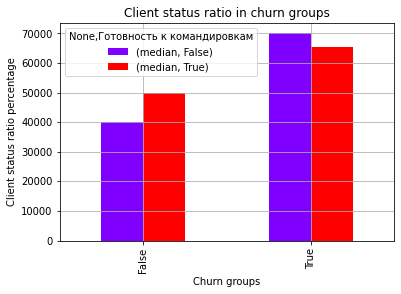

In [129]:
move_trips_wage=merged[merged['ЗП (руб)']<1000000].groupby(['Готовность к переезду','Готовность к командировкам'], as_index=False)['ЗП (руб)'].agg(['median']).unstack()
display(move_trips_wage)

pivot=merged[merged['ЗП (руб)']<1000000].pivot_table(
    values='ЗП (руб)',
    index=['Готовность к переезду','Готовность к командировкам'],
    #columns='ЗП (руб)',
    aggfunc='median',
    fill_value=0
)
display(pivot)
# fig = px.bar(
#     data_frame=move_trips_wage, # DataFrame
#     y='median',
#     color='median',
#     labels={'median':'Желаемая медианная зарплата (руб)'},
#     title='Зависимость медианной желаемой зарплаты от готовности к командировкам и переездам' # заголовок
# )
# #отображаем график
# fig.show()

move_trips_wage.plot(
    kind='bar',
    stacked=False,
    xlabel='Churn groups',
    ylabel='Client status ratio percentage',
    colormap='rainbow',
    grid=True,
    title='Client status ratio in churn groups'
);

#ваши выводы здесь

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [ ]:
# ваш код здесь

ваши выводы здесь

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

In [ ]:
# ваш код здесь

ваши выводы здесь

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [ ]:
# ваш код здесь

ваши выводы здесь

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [ ]:
# ваш код здесь

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [ ]:
# ваш код здесь

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [ ]:
# ваш код здесь

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [ ]:
# ваш код здесь

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [ ]:
# ваш код здесь

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

In [ ]:
# ваш код здесь

ваш коммментарий здесь